<a href="https://colab.research.google.com/github/saipavithraadoni/tesla-sales-prediction/blob/main/%20Tesla_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet

### Importing all the necessary Libraries

In [4]:
# Necessary libraries = Pandas, fbprophet and plotly
# pandas: for Data Manipulation and analysis
import pandas as pd
# fbprophet: for Forcasting
from prophet import Prophet
# plotly: for Data visualization
import plotly.express as px
import plotly.io as pio
pio.renderers.default='colab'

### Importing the Dataset and Exploring it

In [5]:
# read_csv function from pandas
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200
1,2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007,83166000
2,2023-08-02,255.570007,259.519989,250.490005,254.110001,254.110001,101752900
3,2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100
4,2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600
...,...,...,...,...,...,...,...
248,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500
249,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100
250,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800
251,2024-07-30,232.250000,232.410004,220.000000,222.619995,222.619995,100203400


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,214.099052,218.336166,209.917816,214.132845,214.132845,1.078175e+08
std,34.088823,34.717806,33.440649,34.110442,34.110442,2.891574e+07
min,140.559998,144.440002,138.800003,142.050003,142.050003,2.177513e+07
25%,182.000000,184.589996,177.000000,180.009995,180.009995,8.831350e+07
50%,216.500000,220.800003,212.179993,215.990005,215.990005,1.066122e+08
75%,244.979996,251.100006,240.789993,245.339996,245.339996,1.226760e+08
max,277.549988,278.980011,271.000000,276.040009,276.040009,2.438697e+08


### Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [8]:
# Line graph, Area graph, box plot (Analyzing proce and volume)

In [9]:
px.area(df, x='Date', y='Close')

In [10]:
px.line(df, x='Date', y='Close')

In [11]:
px.area(df, x='Date', y='Volume')

In [12]:
px.bar(df, y='Volume')

In [13]:
px.box(df, y='Close')

In [15]:
columns = ['Date', 'Close']
ndf = pd.DataFrame(df, columns=columns)
ndf.head(5)

,Date,Close
0,2023-07-31,267.429993
1,2023-08-01,261.070007
2,2023-08-02,254.110001
3,2023-08-03,259.320007
4,2023-08-04,253.860001


In [16]:
prophet_df = ndf.rename(columns={'Date':'ds', 'Close':'y'})
prophet_df.head(5)

,ds,y
0,2023-07-31,267.429993
1,2023-08-01,261.070007
2,2023-08-02,254.110001
3,2023-08-03,259.320007
4,2023-08-04,253.860001


### Creating Facebook Prophet Model

In [17]:
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4po7wn2n/rytzig87.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4po7wn2n/11n_lp6k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12743', 'data', 'file=/tmp/tmp4po7wn2n/rytzig87.json', 'init=/tmp/tmp4po7wn2n/11n_lp6k.json', 'output', 'file=/tmp/tmp4po7wn2n/prophet_model81cfb6sg/prophet_model-20240731141413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Forecasting

In [18]:
# period: for days like 30 = 1 month
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [19]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-07-31,255.638996,233.015158,273.642305,255.638996,255.638996,-2.604752,-2.604752,-2.604752,-2.604752,-2.604752,-2.604752,0.0,0.0,0.0,253.034244
1,2023-08-01,255.476858,233.838719,276.465807,255.476858,255.476858,-0.540384,-0.540384,-0.540384,-0.540384,-0.540384,-0.540384,0.0,0.0,0.0,254.936474
2,2023-08-02,255.314720,233.718271,273.601901,255.314720,255.314720,-1.037046,-1.037046,-1.037046,-1.037046,-1.037046,-1.037046,0.0,0.0,0.0,254.277674
3,2023-08-03,255.152582,232.739938,272.038654,255.152582,255.152582,-3.284103,-3.284103,-3.284103,-3.284103,-3.284103,-3.284103,0.0,0.0,0.0,251.868479
4,2023-08-04,254.990444,230.807779,272.096476,254.990444,254.990444,-3.903511,-3.903511,-3.903511,-3.903511,-3.903511,-3.903511,0.0,0.0,0.0,251.086933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2024-08-26,259.801517,234.648323,278.539853,257.682415,261.817089,-2.604752,-2.604752,-2.604752,-2.604752,-2.604752,-2.604752,0.0,0.0,0.0,257.196765
279,2024-08-27,260.603437,238.447843,281.052188,258.322179,262.739314,-0.540384,-0.540384,-0.540384,-0.540384,-0.540384,-0.540384,0.0,0.0,0.0,260.063053
280,2024-08-28,261.405358,238.911396,281.374494,259.033573,263.655318,-1.037046,-1.037046,-1.037046,-1.037046,-1.037046,-1.037046,0.0,0.0,0.0,260.368312
281,2024-08-29,262.207278,236.830916,281.054071,259.676260,264.583568,-3.284103,-3.284103,-3.284103,-3.284103,-3.284103,-3.284103,0.0,0.0,0.0,258.923175


In [20]:
px.line(forecast, x='ds', y='yhat')

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



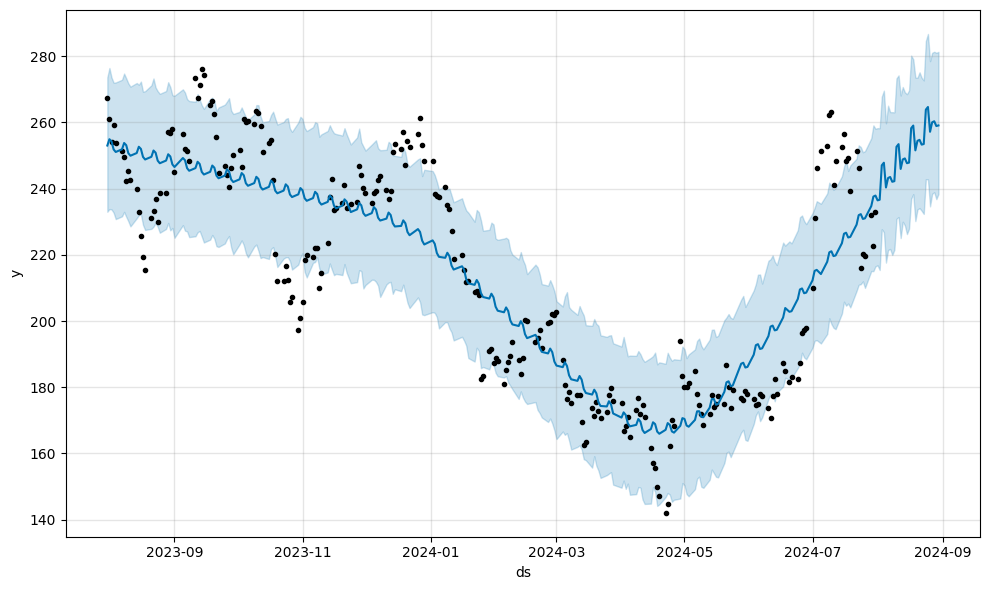

In [21]:
figure = model.plot(forecast, xlabel='ds', ylabel='y')
# black dot is the actual prices

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



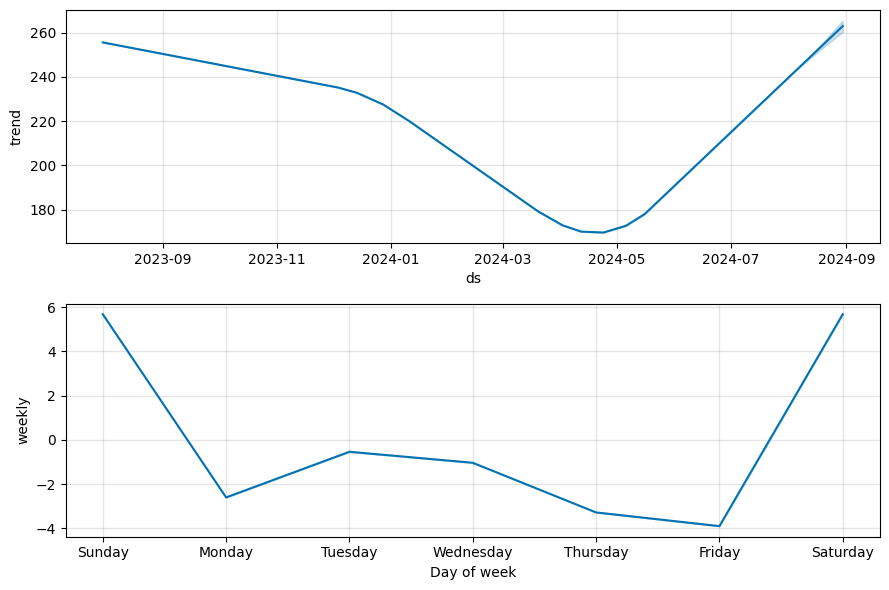

In [22]:
figure2 = model.plot_components(forecast)

### Downloading the Forecast data

In [23]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>